# Part two
(In this part you have chance to work on your own data and thus have free choice of topic)

# Monthly Electricity Production in GWh [2010-2022]
International Energy Agency (IEA)

The data includes information about energy production in various countries on a monthly basis from 2010 to 2022. The energy production is measured in gigawatt-hours (GWh) and covers a range of energy products including hydro, wind, solar, geothermal, nuclear, fossil fuels, and others.

Selected dataset : https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics

The dataset columns include:
* COUNTRY: Name of the country
* CODE_TIME: A code that represents the month and year (e.g., JAN2010 for January 2010)
* TIME: The month and year in a more human-readable format (e.g., January 2010)
* YEAR: The year of the data point
* MONTH: The month of the data point as a number (1-12)
* MONTH_NAME: The month of the data point as a string (e.g., January)
* PRODUCT: The type of energy product -
Hydro, Wind, Solar, Geothermal, Other renewables, Nuclear, Total combustible fuels, Coal, Oil, Natural gas, Combustible renewables, Other combustible non-renewables, Not specified, Net electricity production, Total imports, Total exports, Electricity supplied, Used for pumped storage, Distribution losses, Final consumption, Electricity trade, Renewables, Non-renewables, Others, Other renewables aggregated, Low carbon, Fossil fuels
* VALUE: The amount of electricity generated in gigawatt-hours (GWh)
* DISPLAY_ORDER: The order in which the products should be displayed
* yearToDate: The amount of electricity generated for the current year up to the current month in GWh
* previousYearToDate: The amount of electricity generated for the previous year up to the current month in GWh
* share: The share of the product in the total electricity generation for the country in decimal format


In [211]:
import scipy.stats as stats
import math

from networkx.algorithms.bipartite.basic import color
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import statsmodels.api as sm
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
#path = kagglehub.dataset_download("ccanb23/iea-monthly-electricity-statistics")
#print("Path to dataset files:", path)


In [192]:
df = pd.read_csv("data_monthly_electricity_production_in_gwh.csv")
df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


features: 'COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME', 'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate','share'

## Exercise 2.1 Descriptive statistics analysis for at least two qualitative and quantitative variables

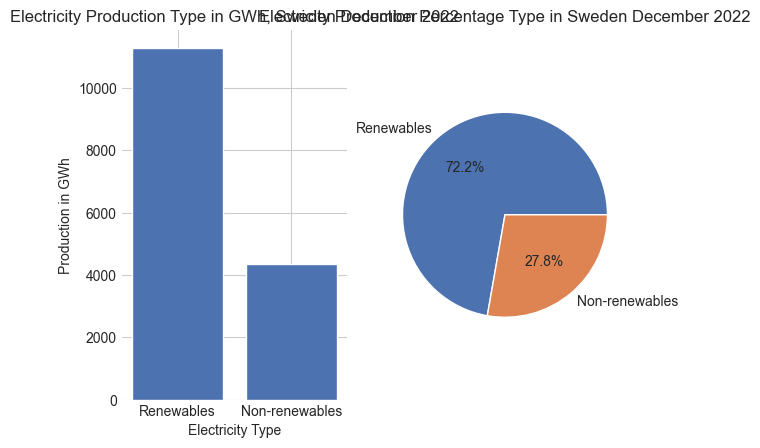

In [193]:
# features: 'COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME', 'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate','share'
df_sweden_dec2022 = df[(df['COUNTRY'] == 'Sweden') & (df['YEAR'] == 2022) & (df['MONTH']==12)].drop(columns=['COUNTRY']).dropna()

plt.subplot(1, 2, 1)
plt.bar(['Renewables', 'Non-renewables'], df_sweden_dec2022.loc[df_sweden_dec2022['PRODUCT'].isin(['Renewables', 'Non-renewables']), 'VALUE'])
plt.title('Electricity Production Type in GWh, Sweden December 2022')
plt.xlabel('Electricity Type')
plt.ylabel('Production in GWh')

plt.subplot(1, 2, 2)
plt.pie(df_sweden_dec2022.loc[df_sweden_dec2022['PRODUCT'].isin(['Renewables', 'Non-renewables']), 'VALUE'], labels=['Renewables', 'Non-renewables'],autopct='%1.1f%%')
plt.title("Electricity Production Percentage Type in Sweden December 2022")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

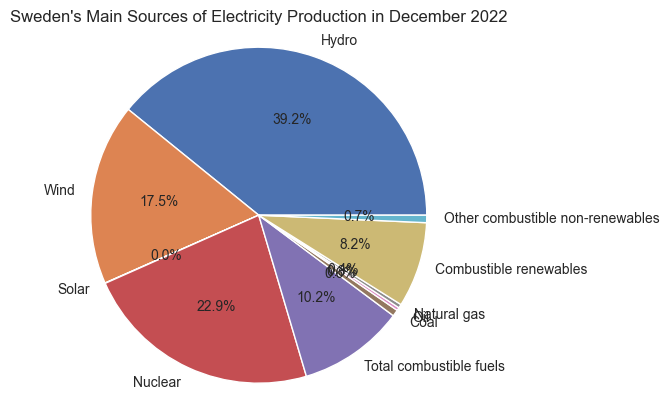

In [194]:
#Hydro, Wind, Solar, Geothermal, Other renewables, Nuclear, Total combustible fuels, Coal, Oil, Natural gas, Combustible renewables, Other combustible non-renewables, Not specified,
df_main_esources_dec = df_sweden_dec2022[(df_sweden_dec2022['PRODUCT'].isin(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Other renewables', 'Nuclear', 'Total combustible fuels', 'Coal', 'Oil', 'Natural gas','Combustible renewables', 'Other combustible non-renewables', 'Not specified']))]

plt.pie(df_main_esources_dec['VALUE'], labels=df_main_esources_dec['PRODUCT'],autopct='%1.1f%%')
plt.title("Sweden's Main Sources of Electricity Production in December 2022")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Statistical Analysis Overview Renewable Electricity Production in Sweden
count      144.000000
mean      8077.731814
std       1599.014216
min       4486.982032
25%       6943.139445
50%       8150.089000
75%       9128.417556
max      12203.182031
Name: VALUE, dtype: float64

Statistical Analysis Overview Non-renewables Electricity Production in Sweden
count     144.000000
mean     5154.663243
std      1075.511109
min      2682.950572
25%      4374.756307
50%      5202.862089
75%      6002.216178
max      7329.062000
Name: VALUE, dtype: float64


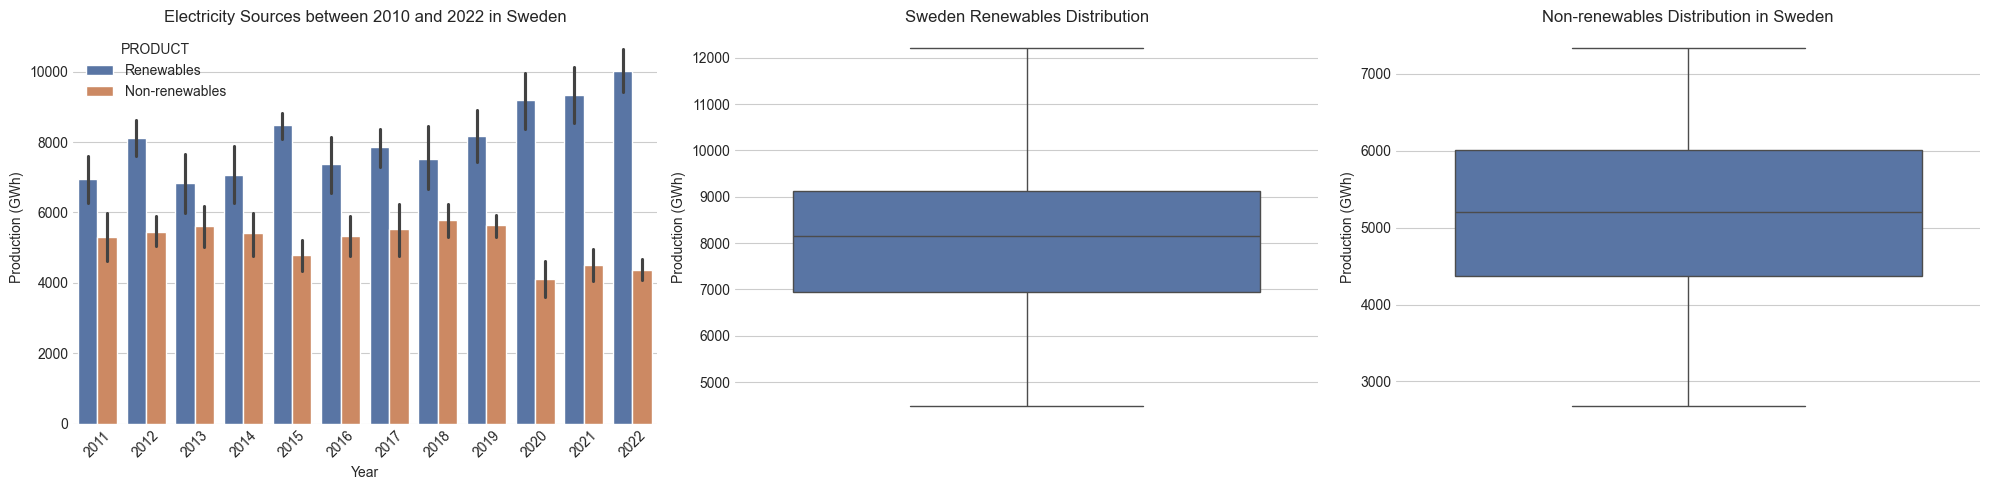

In [195]:
df_etype = df[(df['PRODUCT'].isin(['Renewables', 'Non-renewables'])) & (df['COUNTRY']=='Sweden')].dropna()

df_renewables = df_etype[df_etype['PRODUCT']=='Renewables']['VALUE']
df_non_renewables = df_etype[df_etype['PRODUCT']=='Non-renewables']['VALUE']

print("Statistical Analysis Overview Renewable Electricity Production in Sweden")
print(df_renewables.describe())
print("\nStatistical Analysis Overview Non-renewables Electricity Production in Sweden")
print(df_non_renewables.describe())

sns.set_palette("deep")
# Stretched horizontally
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Increase first number for more width

# Bar plot
sns.barplot(x='YEAR', y='VALUE', hue='PRODUCT', data=df_etype, ax=axes[0], )
axes[0].set_title('Electricity Sources between 2010 and 2022 in Sweden')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Production (GWh)')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for renewables
sns.boxplot(y=df_renewables, ax=axes[1])
axes[1].set_title('Sweden Renewables Distribution')
axes[1].set_ylabel('Production (GWh)')

# Boxplot for non-renewables
sns.boxplot(y=df_non_renewables, ax=axes[2])
axes[2].set_title('Non-renewables Distribution in Sweden')
axes[2].set_ylabel('Production (GWh)')

plt.tight_layout()
plt.show()

Electricity Production in Sweden Summary
count      156.000000
mean     13145.695354
std       2043.345911
min       9263.733000
25%      11441.665659
50%      13106.414145
75%      14799.030307
max      17420.899523
Name: VALUE, dtype: float64


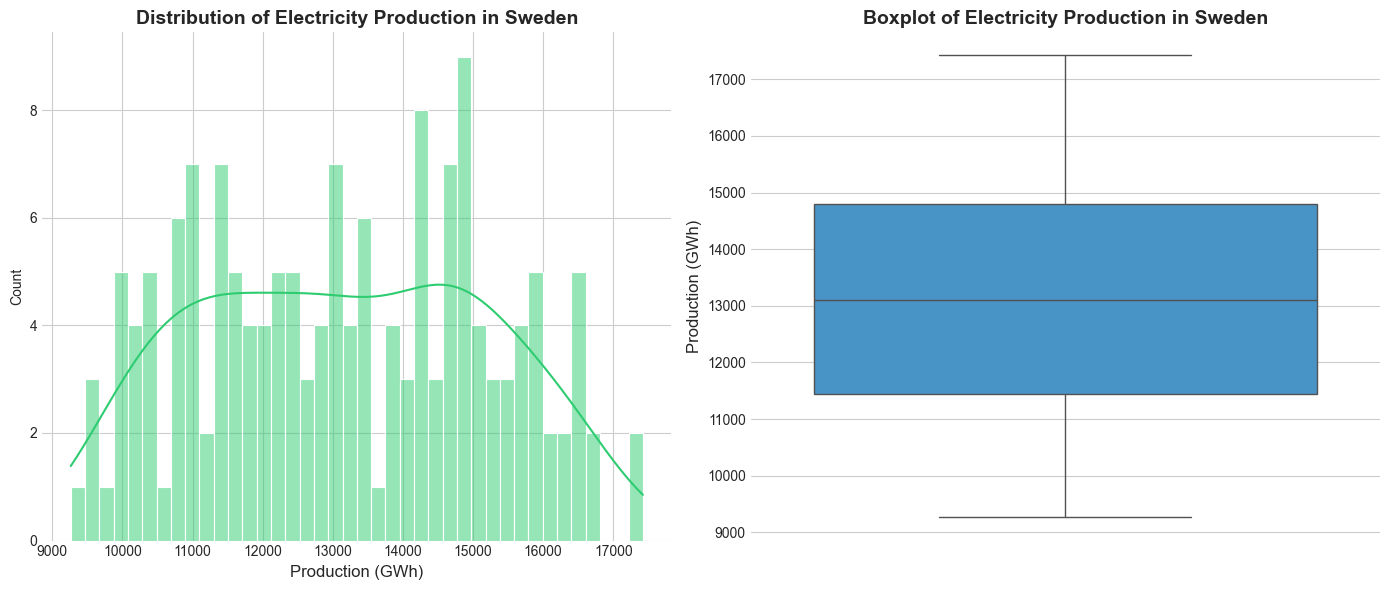

In [196]:
df_prod = df[(df['PRODUCT']=='Net electricity production') & (df['COUNTRY']=='Sweden')]
print('Electricity Production in Sweden Summary')
print(df_prod['VALUE'].describe())
# Set seaborn style
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram with KDE
sns.histplot(df_prod['VALUE'], bins=40, kde=True, color='#2ecc71', ax=axes[0])
axes[0].set_title('Distribution of Electricity Production in Sweden', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Production (GWh)', fontsize=12)

# Boxplot
sns.boxplot(y=df_prod['VALUE'], color='#3498db', ax=axes[1])
axes[1].set_title('Boxplot of Electricity Production in Sweden', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Production (GWh)', fontsize=12)

plt.tight_layout()
plt.show()

## Exercise 2.2 Confidence interval for one quantitative variable; Confidence interval for difference between two groups.

In [197]:
cl = 0.95 #confidence level

ci_up, ci_low = stats.t.interval(cl, df=len(df_prod['VALUE'])-1, loc=df_prod['VALUE'].mean(), scale=df_prod['VALUE'].std() / np.sqrt(len(df_prod['VALUE'])))

print('Confidence Interval for net energy production in Sweden: ', ci_up, ci_low)

Confidence Interval for net energy production in Sweden:  12822.524776695103 13468.86593122797


In [198]:
cl = 0.95 #confidence level

# df_renewables
ci_up_r, ci_low_r = stats.t.interval(cl, df=len(df_renewables)-1, loc=df_renewables.mean(), scale=df_renewables.std() / np.sqrt(len(df_renewables)))

print('Confidence Interval for renewable energy production in Sweden: ', ci_up_r, ci_low_r)


# df_non_renewables
ci_up_nr, ci_low_nr = stats.t.interval(cl, df=len(df_non_renewables)-1, loc=df_non_renewables.mean(), scale=df_non_renewables.std() / np.sqrt(len(df_non_renewables)))

print('Confidence Interval for non-renewable energy production in Sweden: ', ci_up_nr, ci_low_nr)

SE = math.sqrt(((df_renewables.std()/df_renewables.mean())+(df_non_renewables.std()/df_non_renewables.mean())))
ci_up_difference = (np.mean(df_renewables)-np.mean(df_non_renewables)) + 1.96 * SE
ci_low_difference = (np.mean(df_renewables)-np.mean(df_non_renewables)) - 1.96 * SE
print('Confidence interval of difference between energy production of renewables and non-renewables: ', ci_up_difference, ci_low_difference)

#The resulting interval gives a range within which the true difference in average energy production between renewables and non-renewables likely lies.
#If the interval contains zero, there is no statistically significant difference in energy production between renewables and non-renewables at the chosen confidence level.


Confidence Interval for renewable energy production in Sweden:  7814.335237278864 8341.128391540582
Confidence Interval for non-renewable energy production in Sweden:  4977.50037452995 5331.826110845049
Confidence interval of difference between energy production of renewables and non-renewables:  2924.31837191 2921.818771534446


## Exercise 2.3 Carry out a T-test to check if the difference in characteristics between two groups is significant, or conduct an ANOVA to see if all groups have the same mean value in some characteristics.

In [199]:
df_r_denmark = df[(df['PRODUCT']=='Renewables') & (df['COUNTRY']=='Denmark')]['VALUE'].dropna()
df_r_sweden = df_renewables

t_val, p_val = stats.ttest_ind(df_r_denmark, df_r_sweden)

alpha = 0.05
v = len(df_r_denmark)+len(df_r_sweden)-2

crit_t = stats.t.ppf(1 - alpha/2, v)

print("T-value:", t_val)
print("P-Value:", p_val)
print("Critical t-value:", crit_t)

if p_val >alpha:
    print('Fail to reject H0. No strong evidence of difference.')
else:
    print('Reject H0. Significant difference found.')
# The hypothesis that the renewable energy production mean of sweden and denmark are similar is rejected.

T-value: -47.622089789075005
P-Value: 2.3632631185099103e-141
Critical t-value: 1.9679565064965066
Reject H0. Significant difference found.


## Exercise 2.4 Non-parametric test for same variable as in 3) and even compare the conclusion(s) with ANOVA

In [202]:
stat, p_value = stats.mannwhitneyu(df_r_denmark, df_r_sweden)
print('Statistics= %.2f, p= %.2f' % (stat, p_value))
alpha = 0.05
if p_value < alpha:
    print('Reject Null Hypothesis (Significant difference between two samples)')
else:
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics= 0.00, p= 0.00
Reject Null Hypothesis (Significant difference between two samples)


## Exercise 2.5 Correlation analysis, thereafter, identify the strongest correlation and statistically not significant relation(s)

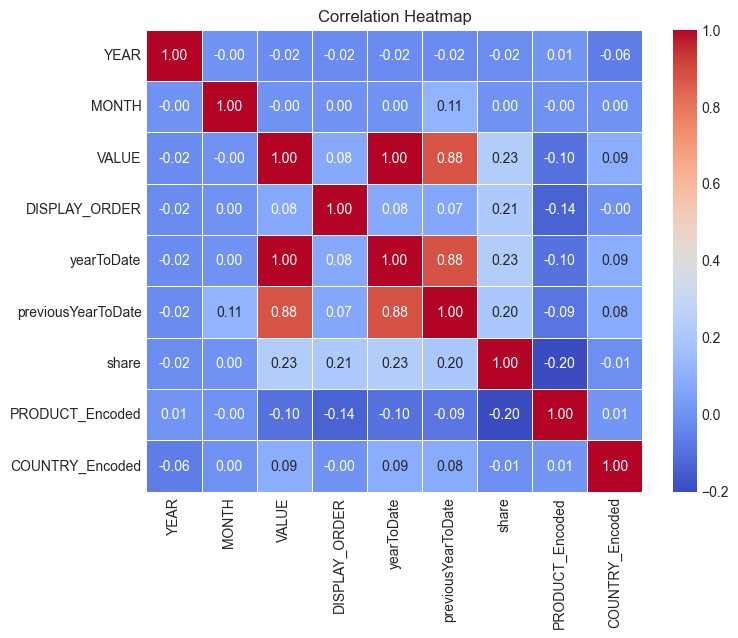

In [213]:
le = LabelEncoder()
df['PRODUCT_Encoded'] = le.fit_transform(df['PRODUCT'])
df['COUNTRY_Encoded'] = le.fit_transform(df['COUNTRY'])

matrix = df._get_numeric_data().corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Exercise 2.6 Make a linear multiple regression analysis.

In [223]:
df_clean = df._get_numeric_data().drop('yearToDate',axis=1).dropna() # drop YeartoDate to avoid Multicollinearity since year to date and value are not independet variables

X = df_clean[df_clean.columns.drop('VALUE')]
y = df_clean['VALUE']

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 5.843e+04
Date:                Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:15:58   Log-Likelihood:            -1.3877e+06
No. Observations:              115367   AIC:                         2.775e+06
Df Residuals:                  115359   BIC:                         2.775e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.536e+04   7.11

### Text book exercise 11.7

Slope (Coefficient): [0.35326666]
Intercept: 31.70866036323249


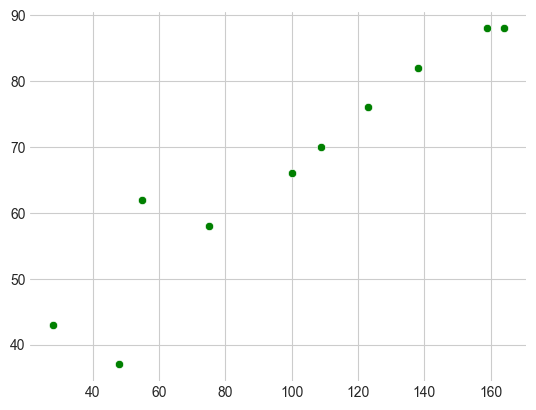

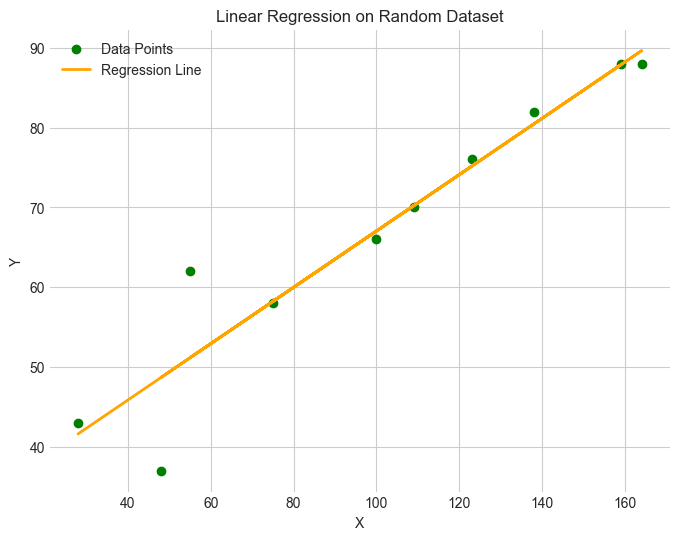

In [240]:
from sklearn.linear_model import LinearRegression

y = [76, 62, 66, 58, 88, 70, 37, 82, 88, 43]
x = [123, 55, 100, 75, 159, 109, 48, 138, 164, 28]

sns.scatterplot(x=x, y=y, color='green')

# Convert to numpy arrays and reshape x to 2D
x = np.array(x).reshape(-1, 1)
y = np.array(y)

model_ex = LinearRegression()
model_ex.fit(x, y)

Y_pred = model_ex.predict(x)

print("Slope (Coefficient):", model_ex.coef_)
print("Intercept:", model_ex.intercept_)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(x, Y_pred, color='orange', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Random Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

